In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
from function import str_to_list
import re

In [2]:
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
th_stop_origin = tuple(thai_stopwords())

In [3]:
df = pd.read_csv('csv/new_data.csv')

Data Preparation

In [4]:
def text_process(text):
    text = re.sub("\[|\]|'|,"," ",text).replace(" ", "")
    return text
def text_process_save_comma(text): ##save ,
    text = re.sub("\[|\]|'|"," ",text).replace(" ", "")
    text = re.sub(r'[0-9]+'," ",text)
    return text
    
# df['text_replace'] = df['text'].apply(text_process)
df['text_replace'] = df['text'].apply(text_process_save_comma)
df

,post_type,text,text_replace
0,2,"['หา', 'สัญญา', 'หอ', 'มจพ', 'ย้าย', 'ปลาย', '...","หา,สัญญา,หอ,มจพ,ย้าย,ปลาย,พฤศ,จิ,ธันวา,เรท,ราค..."
1,1,"['ขาย', 'ตั๋วหนัง', 'black', 'panther', 'โรง',...","ขาย,ตั๋วหนัง,black,panther,โรง,เมเจอร์,gateway..."
2,1,"['อนุญาต', 'ขาย', 'ขาย', 'ตู้', 'เย็น', 'Midea...","อนุญาต,ขาย,ขาย,ตู้,เย็น,Midea, ,q, ,บาท,ขาย,เค..."
3,1,"['XX', 'คน', 'เช่า', 'XX', 'อนุญาต', 'ประกาศ',...","XX,คน,เช่า,XX,อนุญาต,ประกาศ,ประชาสัมพันธ์,สำหร..."
4,1,"['ขาย', 'สัญญา', 'หอ', 'หมู่บ้าน', 'สิ', 'ริน'...","ขาย,สัญญา,หอ,หมู่บ้าน,สิ,ริน, ,ห้อง,ชั้น, , ,ห..."
...,...,...,...
1676,1,"['ขาย', 'สัญญา', 'S9', 'Residence', 'ชั้น', '9...","ขาย,สัญญา,S ,Residence,ชั้น, ,ห้อง, ,ต้น,เดือน..."
1677,2,"['แนว', 'ข้อ', 'สอบ', 'รอบ', 'สอบตรง', 'สำหรับ...","แนว,ข้อ,สอบ,รอบ,สอบตรง,สำหรับ,ปวส,รู้,ข้อ,สอบ,..."
1678,0,"['คน', 'ลืม', 'ศาลยีราฟ', 'ฝาก', 'ร้าน', 'ถ่าย...","คน,ลืม,ศาลยีราฟ,ฝาก,ร้าน,ถ่าย,เอกสาร,ริม,น้ำ"
1679,2,"['พี่', 'คน', 'รอบ', '2', 'สอบ', 'ข้อ', 'แนะนำ...","พี่,คน,รอบ, ,สอบ,ข้อ,แนะนำ,สอบ,คณิต,อังกฤษ,Bms..."


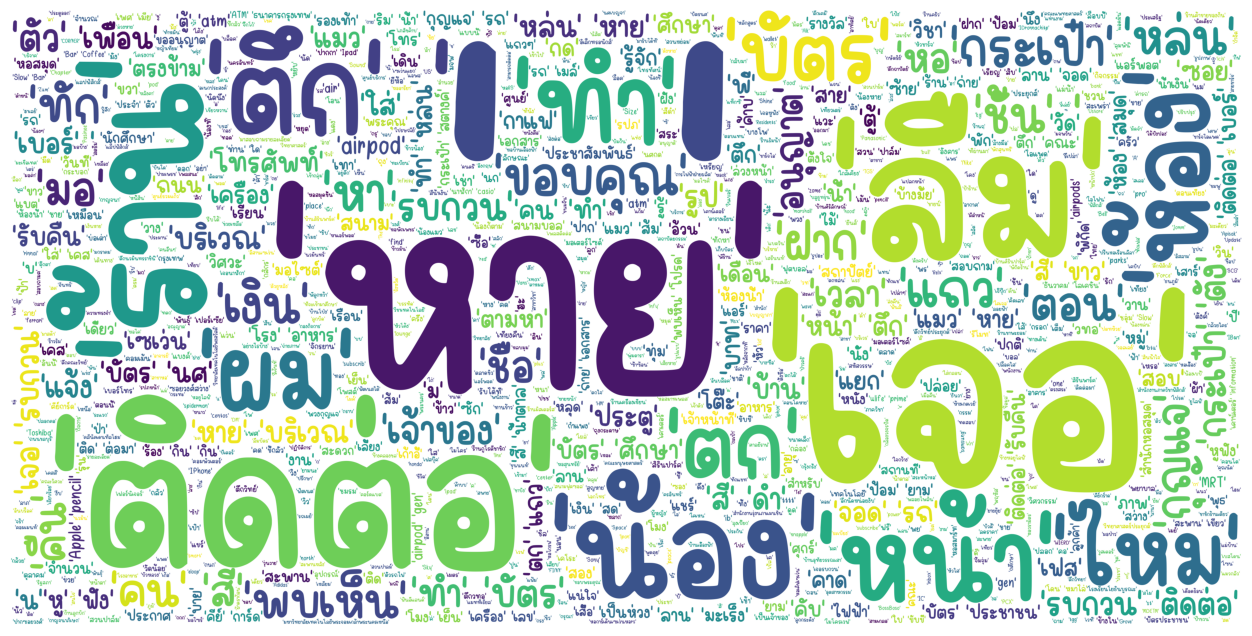

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['post_type'] == 0]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

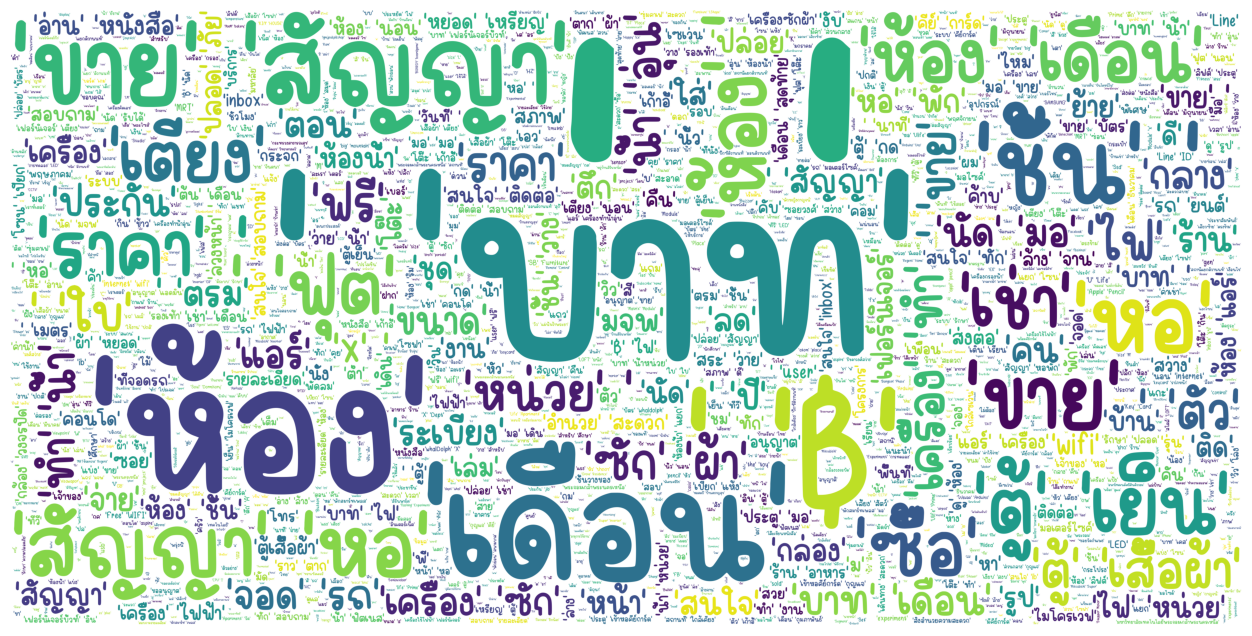

In [11]:
df_pos = df[df['post_type'] == 1]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

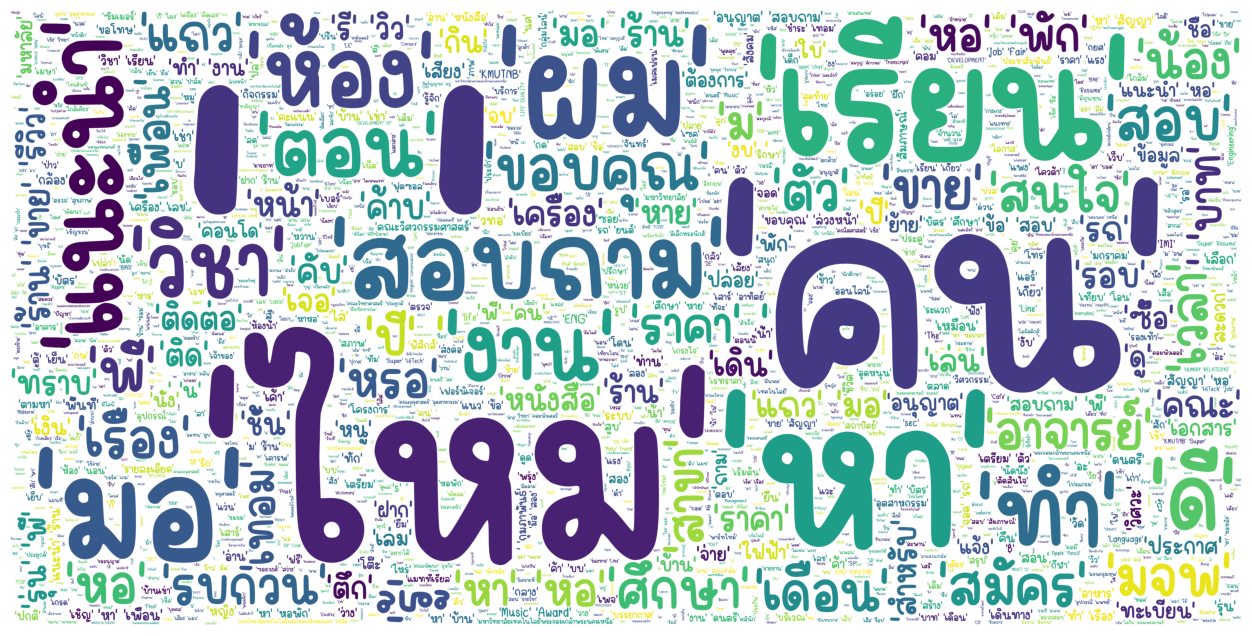

In [6]:
df_pos = df[df['post_type'] == 2]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [7]:
X = df['text_replace']
# X = df['text']
y = df["post_type"]

In [8]:
X[0]

'หา,สัญญา,หอ,มจพ,ย้าย,ปลาย,พฤศ,จิ,ธันวา,เรท,ราคา,ห้อง, ,บาท'

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [18]:
total = df.shape[0]
train = X_train.shape[0]
test = X_test.shape[0]
print(f"Split train 75% test 25%\nTotal datasets : {total}\nTrain datasets : {train}\nTest datasets : {test}")

Split train 75% test 25%
Total datasets : 1681
Train datasets : 1260
Test datasets : 421


**Built model**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
def word_split(text):
    words = re.split(r",",text)
    return words
vectorizer = CountVectorizer(analyzer=word_split,
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=5000,
                             ngram_range=(1, 2))
c_feat = vectorizer.fit_transform(X_train)

c:\Users\Corgi\anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [9]:
vectorizer.vocabulary_

{'ปล่อย': 1846,
 'หนังสือ': 2789,
 'ชื่อ': 1254,
 'เกีอบ': 3127,
 'เล่ม': 3403,
 'สภาพ': 2613,
 'แทบ': 3502,
 'รอย': 2291,
 'ยกเว้น': 2223,
 'วิชา': 2510,
 'อังกฤษ': 3031,
 ' ': 1,
 'บาท': 1734,
 'ม': 2069,
 'ราคา': 2319,
 'มหาลัย': 2099,
 'เรียน': 3378,
 'จันทร์บ่าย': 1166,
 'อังคาร': 3032,
 'พุธ': 2020,
 'พฤหัส': 1948,
 'math': 611,
 'อ': 2978,
 'สุรางค์': 2751,
 'gen': 538,
 'apple': 424,
 'pencil': 642,
 'ไหม': 3785,
 'หอสมุดชั้น': 2889,
 'วาน': 2507,
 'ห้อง': 2967,
 'หอสมุด': 2888,
 'ถาม': 1498,
 'คน': 999,
 'เจอ': 3190,
 'ยื่น': 2254,
 'กู้': 907,
 'กยศ': 791,
 'ทำ': 1547,
 'เอกสาร': 3450,
 'ดู': 1364,
 'เพจ': 3308,
 'งง': 1128,
 'พี่': 1999,
 'แนะนำ': 3510,
 'English': 119,
 'conversation': 474,
 's': 679,
 'อาจารย์': 3048,
 'david': 486,
 'คณะ': 983,
 'สาขา': 2687,
 'เจ้าของ': 3193,
 'เซคหรอคะ': 3213,
 'ใก้': 3720,
 'ล': 2408,
 'ศึกษา': 2562,
 'พัก': 1967,
 'หอ': 2860,
 'ดรปริญญา': 1325,
 'ติดต่อ': 1448,
 'ป้า': 1887,
 'กัญญา': 858,
 'แอร์': 3604,
 'พัด': 1981,
 'ลม': 2415,
 'แ

In [10]:
c_feat[:,:20].todense()

matrix([[0, 8, 0, ..., 0, 0, 0],
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB(alpha=1.0, fit_prior=True)
# transform the list of text to tf-idf before passing it to the model
cls.fit(vectorizer.transform(X_train), y_train)
 
from sklearn.metrics import classification_report, accuracy_score
 
y_pred = cls.predict(vectorizer.transform(X_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9002375296912114
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.81      0.93      0.86       123
           2       0.95      0.87      0.90       230

    accuracy                           0.90       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.91      0.90      0.90       421



In [14]:
import joblib

filename = "./model/check_type.sav"
filenamevec = "./model/count_vectorizer.sav"

joblib.dump(cls,open(filename,"wb"))
joblib.dump(vectorizer,open(filenamevec,"wb"))